In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import data_analysis as da

%matplotlib inline 

### Import satellite data

In [2]:
PATH = '..\data\Traces_Nanosatellites\Traces.csv'

df = pd.read_csv(PATH, sep=',', header=None)
satellites = {}

for i in range(0,100):
    sat = df[df.index.isin([3*i, 3*i+1, 3*i+2])]
    sat['coords'] = ['x','y','z']
    satellites[i] = sat.set_index('coords', drop=True)
    
satellites[0].head()

C:\Users\EAkopyan\AppData\Local\Temp/ipykernel_14120/1279956197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat['coords'] = ['x','y','z']


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
coords,,,,,,,,,,,,,,,,,,,,,
x,-4.850747e+05,-4.937755e+05,-5.024536e+05,-5.111086e+05,-5.197401e+05,-5.283476e+05,-5.369309e+05,-5.454894e+05,-5.540229e+05,-5.625310e+05,...,1.490967e+06,1.494274e+06,1.497573e+06,1.500865e+06,1.504149e+06,1.507425e+06,1.510693e+06,1.513954e+06,1.517206e+06,1.520451e+06
y,-7.066530e+05,-7.201117e+05,-7.335372e+05,-7.469290e+05,-7.602864e+05,-7.736088e+05,-7.868957e+05,-8.001464e+05,-8.133603e+05,-8.265368e+05,...,2.218138e+06,2.223313e+06,2.228477e+06,2.233629e+06,2.238769e+06,2.243898e+06,2.249015e+06,2.254120e+06,2.259214e+06,2.264296e+06
z,-2.026363e+06,-2.019625e+06,-2.012795e+06,-2.005871e+06,-1.998855e+06,-1.991747e+06,-1.984548e+06,-1.977257e+06,-1.969876e+06,-1.962403e+06,...,3.692429e+06,3.686602e+06,3.680756e+06,3.674890e+06,3.669006e+06,3.663103e+06,3.657180e+06,3.651239e+06,3.645278e+06,3.639299e+06


### Establish connection hypotheses and simulation parameters

In [3]:
RANGE = 50000   #Maximum distance between 2 nodes to be connected

In [4]:
NB_NODES = 100      #Number of satellites to analyse
TIMESLOT = 2000     #Number of time samples to analyse

## 1. Node degree analysis
The degree of a node is the number of its direct neighbors.

In [5]:
swarm_neighbors = da.find_swarm_neighbors(satellites, RANGE, TIMESLOT)

swarm_degree = {}
for k in range(0,NB_NODES):
    swarm_degree[k] = [sum(swarm_neighbors[t][k]) for t in swarm_neighbors.keys()]

Finding neighbors: 100%|██████████| 2000/2000 [22:57<00:00,  1.45it/s]


Text(0.5, 1.0, 'Evolution of node degree in time (T=2000)')

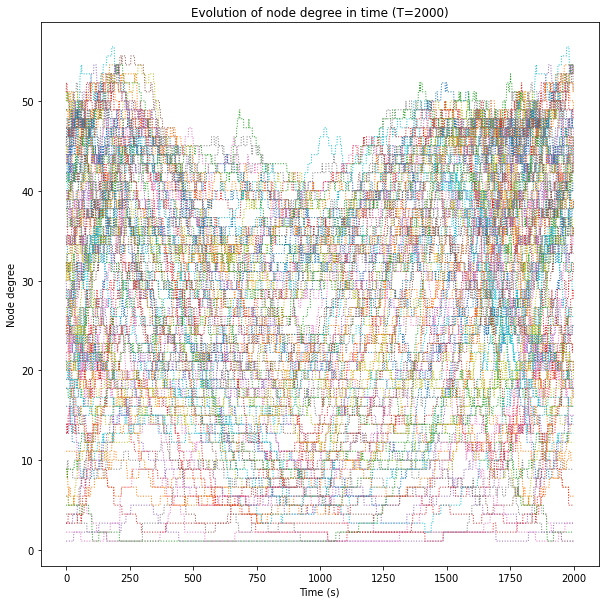

In [6]:
idx = list(swarm_neighbors.keys())

plt.figure(figsize=(10,10))
for k in range(0,NB_NODES):
    plt.plot(idx, swarm_degree[k], ls=':', lw=1)

plt.xlabel('Time (s)')
plt.ylabel('Node degree')
plt.title(f'Evolution of node degree in time (T={TIMESLOT})')

In [7]:
degree_distrib = []
for d_list in swarm_degree.values():
    degree_distrib.extend(d_list)
    
degree_max = np.max(degree_distrib)
degree_avg = np.mean(degree_distrib)
degree_min = np.min(degree_distrib)
print(degree_min, degree_avg, degree_max)

1 26.27398 56


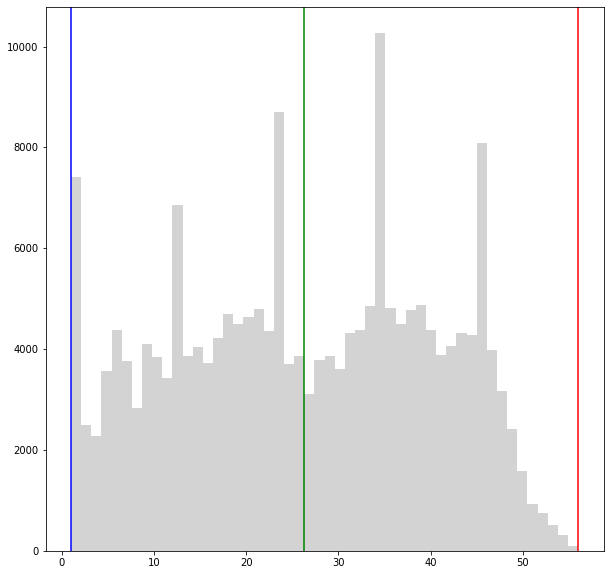

In [8]:
plt.figure(figsize=(10,10))
plt.hist(degree_distrib, density=False, bins=50, color='lightgray')
plt.axvline(degree_min, c='blue', ls='-')
plt.axvline(degree_avg, c='green', ls='-')
plt.axvline(degree_max, c='red', ls='-')

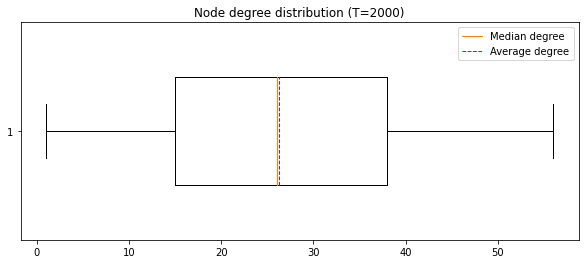

In [9]:
plt.figure(figsize=(10,4))
bp = plt.boxplot(degree_distrib, 
            vert=False, 
            widths=0.5,
            meanline=True, 
            showmeans=True, 
            meanprops={'color':'red','ls':'--'}
            )
plt.title(f'Node degree distribution (T={TIMESLOT})')
plt.legend([bp['medians'][0], bp['means'][0]], ['Median degree', 'Average degree'])

## 2. Analysis of contact and inter-contact times

In [101]:
#node_neighbors.keys()      Timestamps, length TIMESLOT
#node_neighbors[0].keys()   Nodes, length NB_NODES
#node_neighbors[0][0]       List of boolean contacts with other nodes, length NB_NODES-1

In [10]:
node_disp = da.compute_disponibility(swarm_neighbors, NB_NODES, TIMESLOT)

Text(0.5, 0.98, 'Evolution of contacts with node 0 in time (T=2000)')

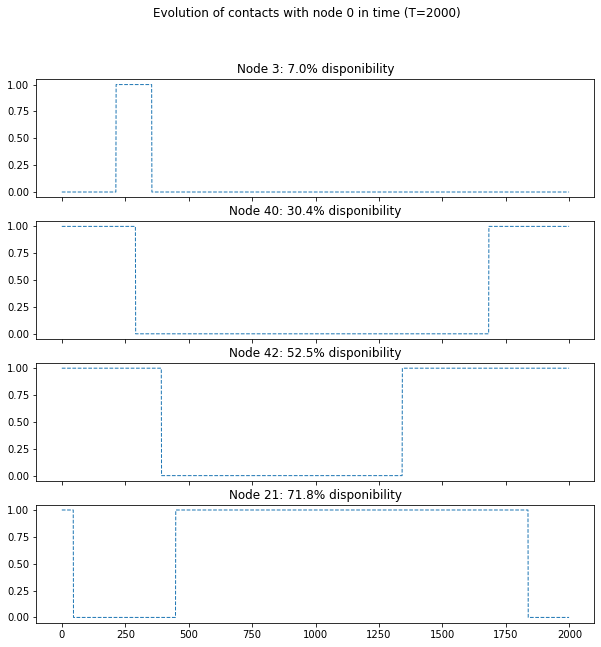

In [30]:
nx = 0
nodes = [3, 40, 42, 21]     #7%, 30%, 52%, 71% link disponibility

idx = list(swarm_neighbors.keys())

fig, axes = plt.subplots(nrows=len(nodes), figsize=(10,10), sharex=True)
for i,k in enumerate(nodes):
    ax = axes[i]
    ax.plot(idx, [swarm_neighbors[t][nx][k] for t in range(TIMESLOT)], ls='--', lw=1, label='Node '+str(k))
    ax.set_title(f'Node {k}: '+'{:.1%}'.format(node_disp[0][k]/100)+' disponibility')

fig.suptitle(f'Evolution of contacts with node {nx} in time (T={TIMESLOT})')